In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pergunta 1

### Iremos fazer a análise apenas dos alunos com situação de matricula cursando ou trancada

In [27]:
alumn_column = ["CO_CINE_ROTULO", "TP_SEXO", "TP_SITUACAO" ]
alunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column )

C:\Users\gmora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
valid_situ = [2,3]
alunos = alunos[alunos['TP_SITUACAO'].isin(valid_situ)] 

In [90]:
cine = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\CINE.CSV", index_col=False, header=0, usecols=["NO_CINE_AREA_GERAL", "CO_CINE_ROTULO"])

In [91]:
#as tabelas tem tipos diferentes para essa variavel que é usada como chave pro merge, precisa deixar igual
cine["CO_CINE_ROTULO"] = cine.CO_CINE_ROTULO.astype(str)
alunos["CO_CINE_ROTULO"] = alunos.CO_CINE_ROTULO.astype(str) 

result = alunos.merge(cine, on="CO_CINE_ROTULO", how='left') #adiciona a coluna de area para cada estudante

result["TP_SEXO"] = result["TP_SEXO"].replace([1,2],["Masc", "Fem"]) #só pra ficar mais bonita a legenda do gráfico

In [ ]:
g = sns.FacetGrid(result, col="NO_CINE_AREA_GERAL", col_wrap=1) #esse FacetGrid que faz gerar vários gráficos separados pra cada área
g.map(sns.histplot, "TP_SEXO", stat="count") 

# Pergunta 2

In [162]:
alumn_column = ["TP_SITUACAO", "NU_IDADE"]
alunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column )

In [163]:
alunos = alunos[alunos['TP_SITUACAO'] == 2]

,NU_IDADE,TP_SITUACAO
1,30,2
2,37,2
3,32,2
4,41,2
6,27,2


### Pessoas até 70 anos

<AxesSubplot:xlabel='Idade', ylabel='Número de alunos'>

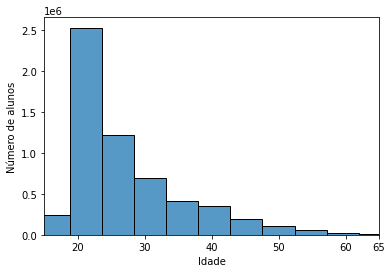

In [190]:
alunos_novos = alunos[alunos["NU_IDADE"] <= 70]
plt.xticks([0,10,20,30,40,50,60,65])
plt.xlabel("Idade")
plt.ylabel("Número de alunos")
plt.xlim(15,65)
sns.histplot(data=alunos, x="NU_IDADE", bins=20)

### Pessoas de mais de 70 anos

<AxesSubplot:xlabel='Idade', ylabel='Número de alunos'>

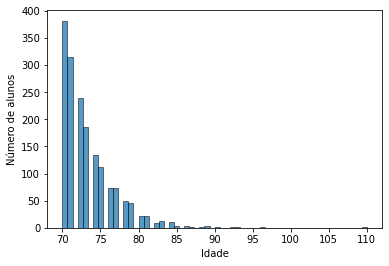

In [189]:
alunos_idosos = alunos[alunos["NU_IDADE"] >= 70]
plt.xlabel("Idade")
plt.ylabel("Número de alunos")
sns.histplot(data=alunos_idosos, x="NU_IDADE")


# Pergunta 3

In [241]:
docente_column = ["ID_DOCENTE", "TP_SITUACAO", "NU_IDADE"]
docente = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Docente.csv", index_col=False, header=0, usecols=docente_column)

### Alguns professores da base estão em exercício em mais de 5 lugares. Consideramos esses professores como erro da base

In [242]:
docente = docente[docente.TP_SITUACAO == 1]
v = docente.ID_DOCENTE.value_counts()
d4 = docente[~(docente.ID_DOCENTE.isin(v.index[v.gt(5)]))] 
#d4.value_counts()

In [243]:
d4.NU_IDADE.sort_values(ascending=False)

79706     101
277758     98
59421      95
72753      94
245953     93
         ... 
355543     21
285766     21
353063     21
371431     21
326867     20
Name: NU_IDADE, Length: 378857, dtype: int64

<AxesSubplot:xlabel='Idade', ylabel='Número de alunos'>

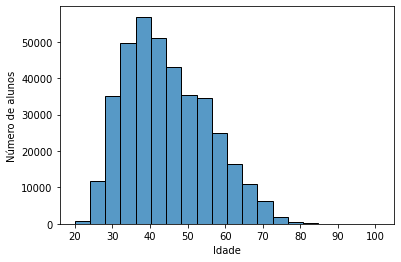

In [244]:
plt.xlabel("Idade")
plt.ylabel("Número de alunos")
#plt.xlim(10,90)
sns.histplot(data=d4, x="NU_IDADE", bins=20)

# Pergunta 4

### Para acessar a lista de nomes de curso válidos, acesse o arquivo "NomeCursosCine.xlsx"

In [50]:
curso_columns = ["CO_LOCAL_OFERTA", "CO_CINE_ROTULO"]
curso = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Curso.csv", index_col=False, header=0, usecols=curso_columns)

In [51]:
cine_columns = ["CO_CINE_ROTULO", "NO_CINE_ROTULO"]
cine = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\CINE.CSV", index_col=False, header=0, usecols=cine_columns)

In [52]:
curso = curso.merge(cine, on="CO_CINE_ROTULO", how='left')

In [53]:
print("Digite qual curso deseja descobrir em quantos lugares é ofertado")
nome_curso_consultado = str(input())
print("Curso digitado:", nome_curso_consultado)
qtd = np.size(curso[curso.NO_CINE_ROTULO == nome_curso_consultado]["CO_LOCAL_OFERTA"])
if qtd <= 0:
    print("\nCurso não encontrado. Favor verificar a lista de cursos válidos!")
else:
    print("\nEsse curso é ofertado em {} locais".format(qtd))

Digite qual curso deseja descobrir em quantos lugares é ofertado
Curso digitado: Direito

Esse curso é ofertado em 1569 locais


# Pergunta 5

### Desistência: corresponde aos alunos com situação de vínculo igual a “desvinculado do curso” ou “transferido para outro curso da mesma IES”

### Como estamos tratando apenas o ano de 2019 dos microdados da educação superior não é possível realizar o cálculo da taxa de desistência acumulada, por isso optamos pela de desistência anual

### Taxa de Desistência Anual (INEP - DEED): percentual do número de estudantes que saíram (desvinculado ou transferido) do curso j no ano t em relação ao número de estudantes ingressantes no curso j do ano T, subtraindo-se o número de estudantes falecidos do curso j no ano t


In [8]:
alumn_column = ["TP_SITUACAO", "NU_IDADE", "ID_ALUNO", "IN_INGRESSO_TOTAL", "CO_CINE_ROTULO"]
alunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column )

c:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\AmbienteCDD\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
tada_df = pd.DataFrame(columns=["Curso", "Tada"])

for i in alunos.CO_CINE_ROTULO.unique():
    alunos_curso = alunos[alunos.CO_CINE_ROTULO == i]
    alunos_desistentes = alunos_curso[alunos_curso.TP_SITUACAO.isin([4,5])]
    alunos_ingressos = alunos_curso[alunos_curso.IN_INGRESSO_TOTAL == 1]
    alunos_rip = alunos_curso[alunos_curso.TP_SITUACAO == 7]
    fator = np.size(alunos_desistentes)
    quociente = np.size(alunos_ingressos)-np.size(alunos_rip)
    if quociente == 0:
        salva_ai = {'Curso': i, 'Tada': 100}
        tada_df.append(salva_ai, ignore_index=True)
    else:
        salva_ai = {'Curso': i, 'Tada': (fator/quociente*100)}
        tada_df.append(salva_ai, ignore_index=True)


,Curso,Tada
